### Business Problem

> Being an IT hub, its also a great place for businesses like malls, cinema and recreational places as most of the people here are dependent mainly on the restaurant food as they don’t have time to cook for themselves. With such an overwhelming demand of restaurants it has therefore become important to study the demography of a location
> Starting a Cafe with nice ambiance and food would be a great idea in a place like Bengaluru. We need to look at different factors that will help in deciding which will be the best location. We are considering the below factors for trying to address this business problem:
  1. Which locations have the best rated Cafes
  2. Which locations have potential customers for our Cafe
  3. Which locations have very few Cafes
  4. Which location has optimal commercial rent and maintenance
  5. Which location has closest reach to raw materials and at low cost
  6. How many food places are present in each area with more than 3 or 4 rating
  7. Which dishes and which cuisine are the best rated across all the Cafes
  8. What is the per person cost of the place
  9. What are Cafes that are best rated for ambience in each location

### EDA

In [94]:
import pandas as pd
import numpy as np
import ast
import re
import math
!pip install geopy
!pip install plotly
from geopy import geocoders
from geopy.geocoders import Nominatim

from IPython.display import Image 
from IPython.core.display import HTML 
from folium.plugins import FloatImage
import folium # plotting library

import matplotlib.pyplot as plt
import seaborn as sns

# Plotly
from plotly.offline import init_notebook_mode, plot, iplot
import plotly.graph_objs as go
import plotly as py
init_notebook_mode(connected=True)
%matplotlib inline

In [95]:
dat=pd.read_csv('cafe_data.csv')

In [26]:
dat.head()

,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people)
0,San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800
1,Onesta,Yes,Yes,4.6/5,2556,080 48653961\r\n080 48655715,Banashankari,"Casual Dining, Cafe","Farmhouse Pizza, Chocolate Banana, Virgin Moji...","Pizza, Cafe, Italian",600
2,Penthouse Cafe,Yes,No,4.0/5,324,+91 8884135549\r\n+91 9449449316,Banashankari,Cafe,"Pizza, Mocktails, Coffee, Nachos, Salad, Pasta...","Cafe, Italian, Continental",700
3,Smacznego,Yes,No,4.2/5,504,+91 9945230807\r\n+91 9743804471,Banashankari,Cafe,"Waffles, Pasta, Coleslaw Sandwich, Choco Waffl...","Cafe, Mexican, Italian, Momos, Beverages",550
4,CafÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂ© Down The A...,Yes,No,4.1/5,402,080 26724489\r\n+91 7406048982,Banashankari,Cafe,"Waffles, Pasta, Crispy Chicken, Honey Chilli C...",Cafe,500


In [45]:
distnct_loc=pd.DataFrame(np.unique(dat[['location']]))
distnct_loc.columns=['location']
distnct_loc

,location
0,BTM
1,Banashankari
2,Banaswadi
3,Bannerghatta Road
4,Basavanagudi
...,...
61,Vasanth Nagar
62,Vijay Nagar
63,Whitefield
64,Wilson Garden


In [ ]:
## lets add coordinates uisng geopy
from geopy.exc import GeocoderTimedOut
import time

geolocator = Nominatim(user_agent='mya')
for index,row in distnct_loc.iterrows():
    try:
        loc = geolocator.geocode(distnct_loc.loc[index,'location'],timeout=500)
        distnct_loc.loc[index,'lat']=loc.latitude
        distnct_loc.loc[index,'long']=loc.longitude  
        #time.sleep(50)
    except GeocoderTimedOut as e:
        print("Error: geocode failed on input %s with message %s"%(distnct_loc.loc[index,'location'], e.message))

In [96]:
#distnct_loc.to_csv('loc_coord_nw.csv')
distnct_loc=pd.read_csv('loc_coord_nw.csv')
data=pd.merge(dat,distnct_loc,on="location")
data.head(5)

,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),Unnamed: 0,lat,long
0,San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,1,15.887678,75.704678
1,Onesta,Yes,Yes,4.6/5,2556,080 48653961\r\n080 48655715,Banashankari,"Casual Dining, Cafe","Farmhouse Pizza, Chocolate Banana, Virgin Moji...","Pizza, Cafe, Italian",600,1,15.887678,75.704678
2,Penthouse Cafe,Yes,No,4.0/5,324,+91 8884135549\r\n+91 9449449316,Banashankari,Cafe,"Pizza, Mocktails, Coffee, Nachos, Salad, Pasta...","Cafe, Italian, Continental",700,1,15.887678,75.704678
3,Smacznego,Yes,No,4.2/5,504,+91 9945230807\r\n+91 9743804471,Banashankari,Cafe,"Waffles, Pasta, Coleslaw Sandwich, Choco Waffl...","Cafe, Mexican, Italian, Momos, Beverages",550,1,15.887678,75.704678
4,CafÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂ© Down The A...,Yes,No,4.1/5,402,080 26724489\r\n+91 7406048982,Banashankari,Cafe,"Waffles, Pasta, Crispy Chicken, Honey Chilli C...",Cafe,500,1,15.887678,75.704678


#### EDA

In [97]:
#no of cafes by location
d=data.groupby('location')['name'].count()
d=pd.DataFrame({'location':d.index, 'counts':d.values}).sort_values(by=['counts'],ascending=False)
d.head(20)

,location,counts
35,Koramangala 5th Block,468
22,Indiranagar,327
0,BTM,320
25,Jayanagar,235
24,JP Nagar,204
41,MG Road,202
19,HSR,188
60,Ulsoor,175
34,Koramangala 4th Block,169
37,Koramangala 7th Block,154


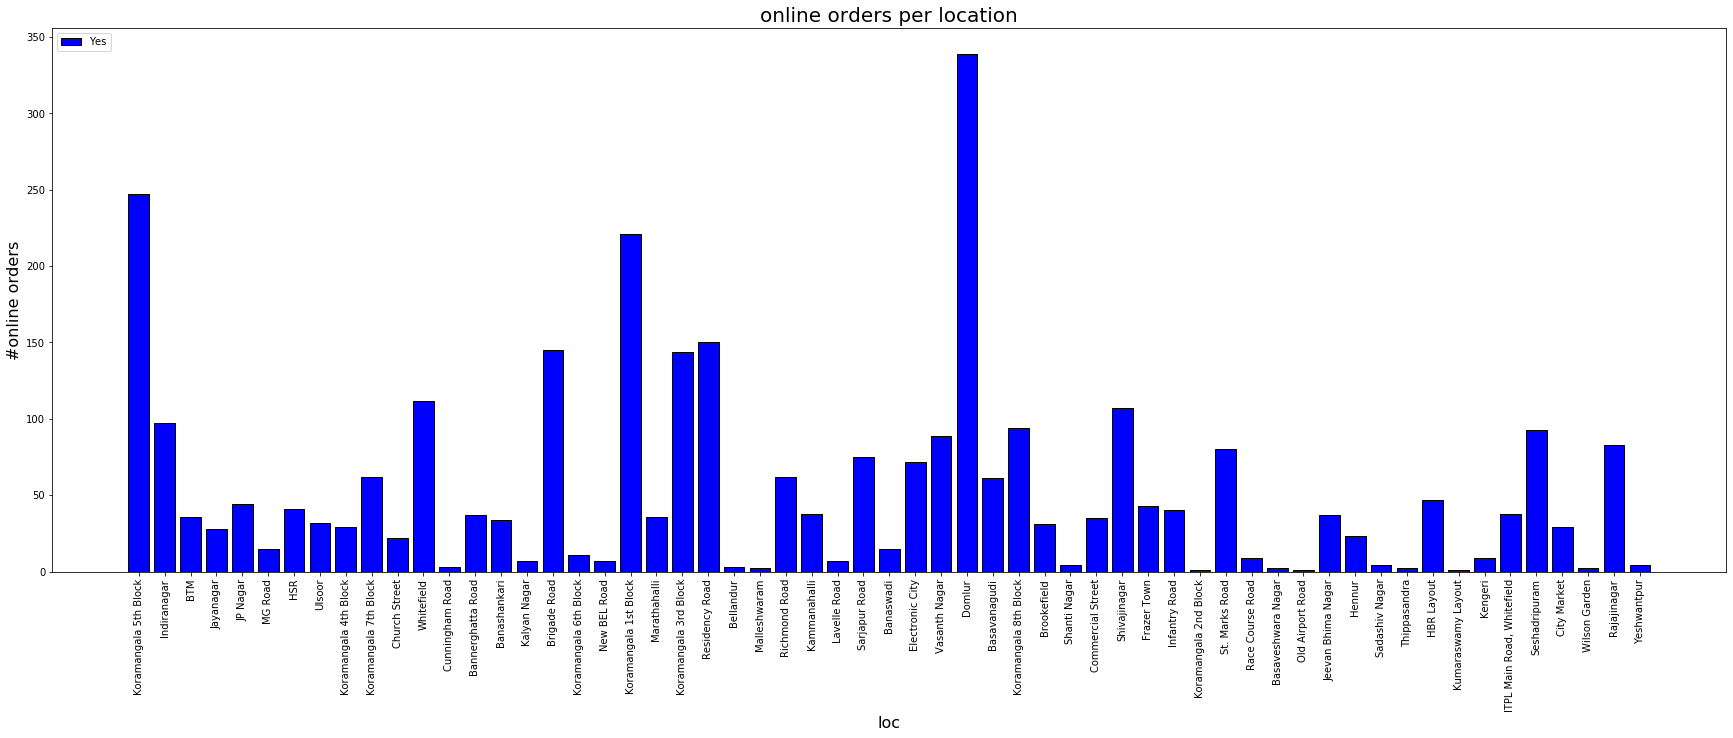

In [135]:
#how many of them accept online orders by location
d_onl=data[data['online_order']=='Yes'].groupby('location')['name'].count()
#d_ofl=data[data['online_order']=='No'].groupby('location')['name'].count()
#dn=d_ofl.reset_index()
#dn=dn.sort_values(by=['name'],ascending=False)
#online=['Yes','no']
p=np.arange(len(d_onl))

plt.bar(p,d_onl,color='blue',edgecolor='black')
#plt.bar(p,d_ofl,color='pink',edgecolor='black')
plt.xticks(p,d.loc[:,'location'],rotation='vertical')
plt.xlabel('loc', fontsize=16)
plt.ylabel('#online orders', fontsize=16)
plt.title('online orders per location',fontsize=20)
plt.legend(online,loc=2)
plt.rcParams['figure.figsize'] = [30, 10]
plt.show()

In [100]:
#location wise ratings; checking how many 5 4 and 3 rated are present in each location and how popular(#votes) each is 
data.rate.replace(['-', 'NEW'], [0, 0], inplace=True)
data.rate.fillna(0,inplace=True)
data['rate']=data['rate'].apply(lambda x: re.sub("/5","",str(x)))
data.rate.unique()

array(['3.8', '4.6', '4.0', '4.2', '4.1', '3.9', '3.1', '3.0', '3.7',
       '3.6', '3.2', '3.3', '0', '3.4', '3.8 ', '2.8', '3.7 ', '3.9 ',
       '2.6', '4.3', '2.9', '4.3 ', '4.2 ', '4.1 ', '3.5 ', '3.5', '2.5',
       '4.6 ', '4.0 ', '3.4 ', '2.5 ', '3.0 ', '2.9 ', '4.4', '2.7',
       '2.6 ', '2.7 ', '3.3 ', '4.5', '3.1 ', '3.6 ', '4.5 ', '2.8 ',
       '3.2 ', '4.4 ', '4.7', '4.7 ', '2.4', '2.4 ', '2.3'], dtype=object)

In [101]:
data['rate']=data['rate'].apply(lambda x: float(x))
# data.groupby(['location','rate'])['name'].count()

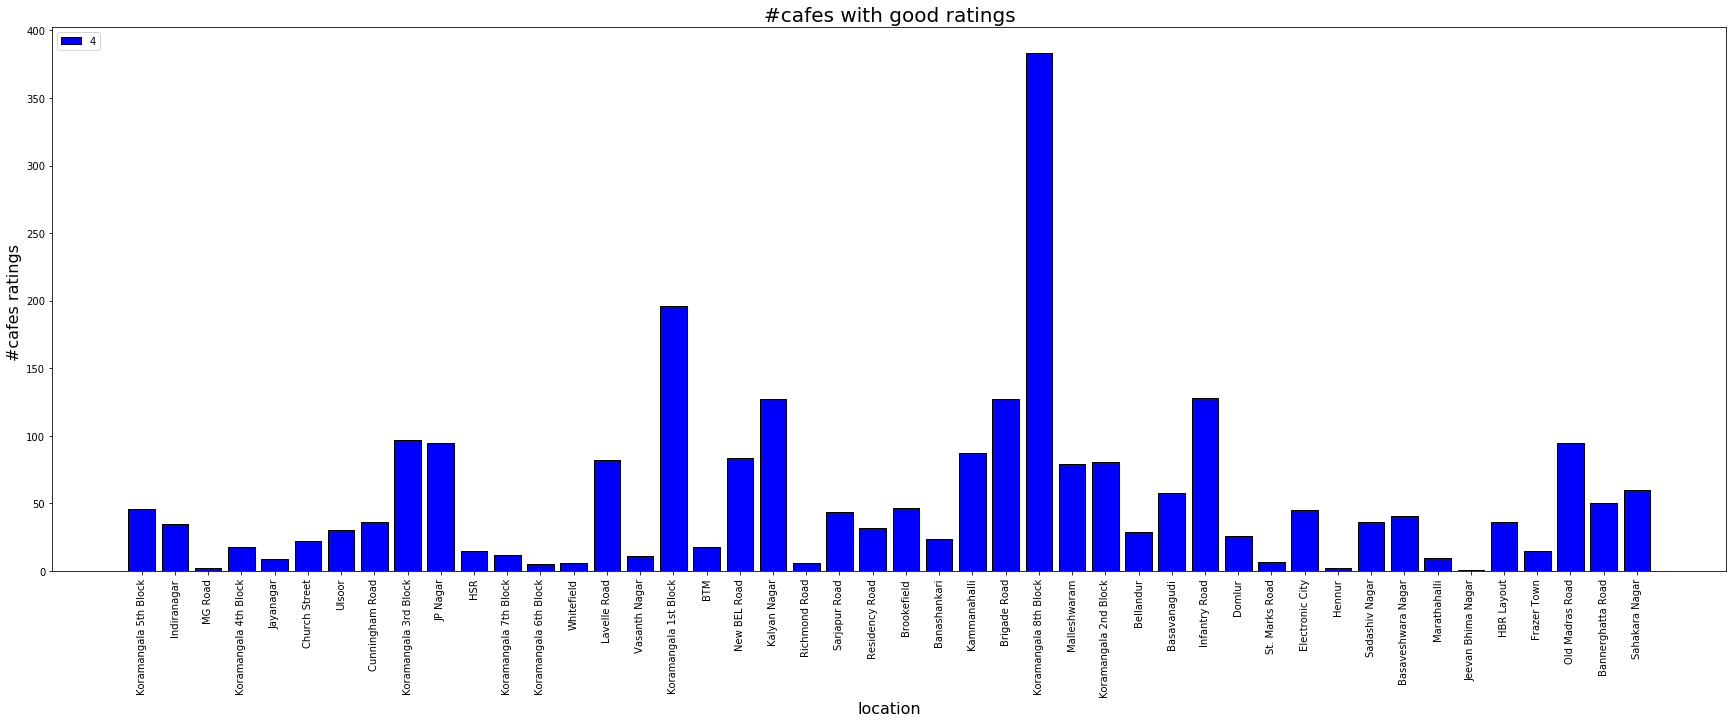

In [126]:
rt_4=data[data['rate']>=4].groupby('location')['name'].count()
dn=rt_4.reset_index()
dn=dn.sort_values(by=['name'],ascending=False)
p4=np.arange(len(rt_4))

#p=np.arange(len(data.location))

plt.bar(p4,rt_4,color='blue',edgecolor='black')
plt.xticks(p4,dn.loc[:,'location'],rotation='vertical')
plt.xlabel('location', fontsize=16)
plt.ylabel('#cafes ratings ', fontsize=16)
plt.title('#cafes with good ratings',fontsize=20,color='black')
plt.legend(ratings,loc=2)
plt.rcParams['figure.figsize'] = [30, 10]
plt.show()

In [134]:
m=data[data['rate']>=4].groupby('location')['name'].count()
m=pd.DataFrame({'location':m.index, 'top_cnts':m.values}).sort_values(by=['top_cnts'],ascending=False)
r=pd.merge(m,d,on='location')
r['%top']=(r['top_cnts']/r['counts'])*100
r.sort_values(by=['%top','counts'])

,location,top_cnts,counts,%top
44,Bannerghatta Road,2,116,1.724138
39,Marathahalli,7,87,8.045977
42,Frazer Town,5,40,12.500000
17,BTM,46,320,14.375000
35,Electronic City,12,58,20.689655
26,Brigade Road,30,111,27.027027
30,Bellandur,22,78,28.205128
33,Domlur,15,51,29.411765
24,Banashankari,35,114,30.701754
28,Malleshwaram,26,73,35.616438


In [108]:
#count of diff cuisine cafes for each region
m=data.groupby(['location','cuisines'])['name'].count()
m=pd.DataFrame(m)
m=m.reset_index()
m=m.sort_values(by='name',ascending=False)
m.head(10)

,location,cuisines,name
2,BTM,Cafe,68
368,Koramangala 5th Block,"Cafe, Continental, Beverages",52
427,MG Road,Cafe,46
125,Cunningham Road,"North Indian, Thai, Japanese, Continental, Cafe",34
208,Indiranagar,"Cafe, Continental",31
87,Brigade Road,Cafe,31
252,JP Nagar,Cafe,30
276,Jayanagar,Cafe,30
337,Koramangala 1st Block,Cafe,30
13,BTM,"Cafe, Fast Food",29


In [115]:
#avg rating for each location, cusinine 
cus=data.groupby(['location','cuisines'])['rate'].mean()
cus=pd.DataFrame(cus)
cus=cus.reset_index()
cus=cus.sort_values(by='rate',ascending=False)
cus.head(20)

,location,cuisines,rate
364,Koramangala 5th Block,"Cafe, American, Burger, Steak",4.700000
386,Koramangala 5th Block,"Chinese, American, Continental, Italian, North...",4.700000
469,New BEL Road,"Cafe, American, Burger, Steak",4.700000
125,Cunningham Road,"North Indian, Thai, Japanese, Continental, Cafe",4.688235
408,Koramangala 7th Block,"Cafe, Desserts, Continental",4.615789
239,Indiranagar,"Desserts, Cafe, Beverages",4.600000
350,Koramangala 4th Block,"Cafe, American, Burger",4.600000
113,Church Street,"Cafe, Pizza, Beverages",4.600000
37,Banashankari,"Pizza, Cafe, Italian",4.600000
202,Indiranagar,"Cafe, American, Burger, Steak",4.600000


In [55]:
#people votes/popularity of the cafe:
a=data.loc[:, data.columns.isin(['location','name','votes'])].groupby(['location','name'])['votes'].max()
a=a.reset_index()
a.sort_values(by='votes',ascending=False)

,location,name,votes
459,Koramangala 5th Block,Truffles,14726
421,Koramangala 4th Block,Onesta,9085
427,Koramangala 4th Block,The Hole in the Wall Cafe,7137
261,Indiranagar,Glen's Bakehouse,5352
572,New BEL Road,Onesta,4897
...,...,...,...
311,JP Nagar,Furry Fairy Paw Paradise,0
641,Thippasandra,Aahar Cafe,0
305,JP Nagar,Crave Bit Cafe,0
102,Bellandur,Re:fuel- Aloft Bengaluru Cessna Business Park,0


In [75]:
#expense of restrtaunt wrt rating and vote
s=data.loc[:, data.columns.isin(['location','name','approx_cost(for two people)'])]
s['cost']=s['approx_cost(for two people)'].apply(lambda x: float(re.sub(",", "",str(x))))
s=s.groupby(['location','name'])['cost'].mean()
s=s.reset_index()
s.sort_values(by='cost',ascending=False)

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,location,name,cost
505,MG Road,Cafe Mozaic - Taj MG Road Bengaluru,2500.0
654,Ulsoor,The Lobby Brew - Conrad Bengaluru,2200.0
663,Vasanth Nagar,The Lobby Lounge - Shangri-La Hotel,2000.0
674,Whitefield,Cafe Palmyra,2000.0
507,MG Road,CafÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂ...,1700.0
...,...,...,...
638,Shivajinagar,Savera Cafe,50.0
155,Domlur,Origin Espresso Bar,NaN
248,Indiranagar,Chaipatty,NaN
448,Koramangala 5th Block,Krazy Factory,NaN


In [114]:
#to understand if our cafes expense will suit the location avg rating and popularity
new=pd.merge(s,a,on=['location','name'])
new.sort_values(by=['votes','cost'],ascending=False).head(30)


,location,name,cost,votes
459,Koramangala 5th Block,Truffles,900.0,14726
421,Koramangala 4th Block,Onesta,600.0,9085
427,Koramangala 4th Block,The Hole in the Wall Cafe,600.0,7137
261,Indiranagar,Glen's Bakehouse,600.0,5352
572,New BEL Road,Onesta,600.0,4897
146,Cunningham Road,Hammered,1300.0,4845
274,Indiranagar,Onesta,600.0,4709
314,JP Nagar,Onesta,600.0,4421
581,New BEL Road,Truffles,900.0,3916
209,HSR,Onesta,600.0,3859


### Insights/Recommendations

Starting with locations where most people visit
and those where high rated are few, so that there is low competetion are New BEL road 
JP Nagar and HSR. howver, looking at #cafes around,JP Nagar and HSR have many around,as compared to New BEL road. But if you want to be open for online ordering service as well, then JP Nagar and HSR are better. So based on your budget either of the locations will be good, with two person cost around 600-900.

### Conclusion

Although analysisng different restraunts data can help in this analysis, factors like age group, economy of the location will be affecting the real world scenario.
however, condiering different factors mentioned above,conclusion is that opening a new Cafe in HSR or JP nagar would be a best option